In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy as sp
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 86. Python coding Simple Linear Regression

In [2]:
data_dir = Path('data')
file_name = 'Advertising.csv'

file_path = data_dir / file_name

df = pd.read_csv(file_path)


In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

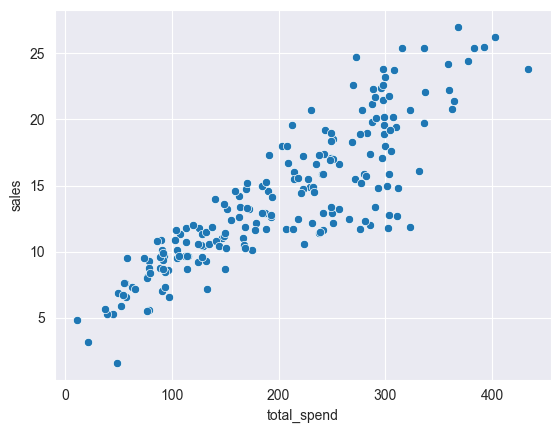

In [6]:
sns.scatterplot(data=df, x='total_spend', y='sales')

<Axes: xlabel='total_spend', ylabel='sales'>

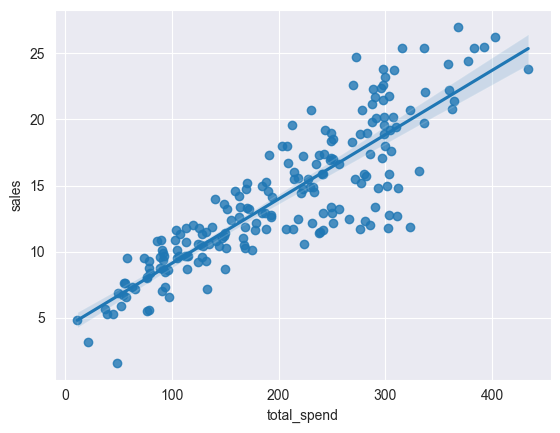

In [7]:
sns.regplot(data=df, x='total_spend', y='sales')

In [8]:
X = df['total_spend']
y = df['sales']

In [9]:
# y = mx + b
# y = B1X + B0
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [10]:
potential_spend = np.linspace(0, 500, 100)

In [11]:
# y = B1X + B0
predicted_sales = 0.04868788 * potential_spend + 4.24302822

<Axes: xlabel='total_spend', ylabel='sales'>

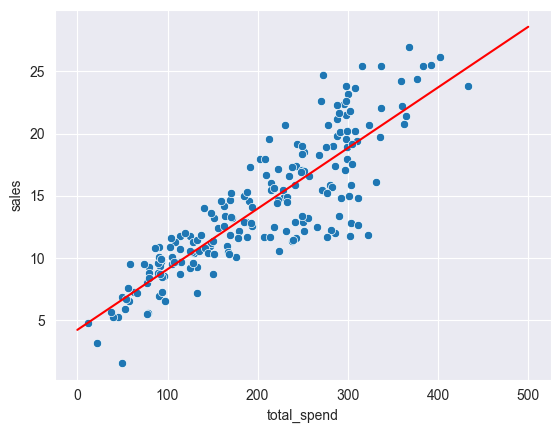

In [12]:
plt.plot(potential_spend, predicted_sales, color='red')
sns.scatterplot(data=df, x='total_spend', y='sales')

In [13]:
spend = 200

predicted_sales = 0.04868788 * spend + 4.24302822

In [14]:
predicted_sales

13.98060422

In [15]:
# y = B3*X^3 + B2*X^2 + B1*X + B0 
np.polyfit(X, y, deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [16]:
pot_spend = np.linspace(0, 500, 100)

In [17]:
pred_sales = 3.07615033e-07 * pot_spend**3 -1.89392449e-04 * pot_spend**2 + 8.20886302e-02 * pot_spend + 2.70495053e+00

<Axes: xlabel='total_spend', ylabel='sales'>

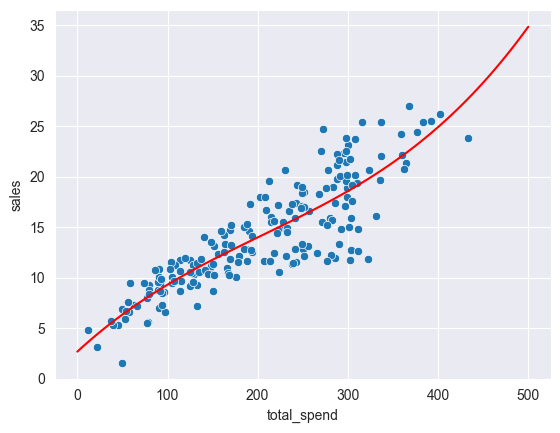

In [18]:
plt.plot(pot_spend, pred_sales, color='red')
sns.scatterplot(data=df, x='total_spend', y='sales')

# 88. Linear Regression - Scikit-Learn Train Test Split

In [19]:
df = pd.read_csv('data/Advertising.csv')

In [20]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


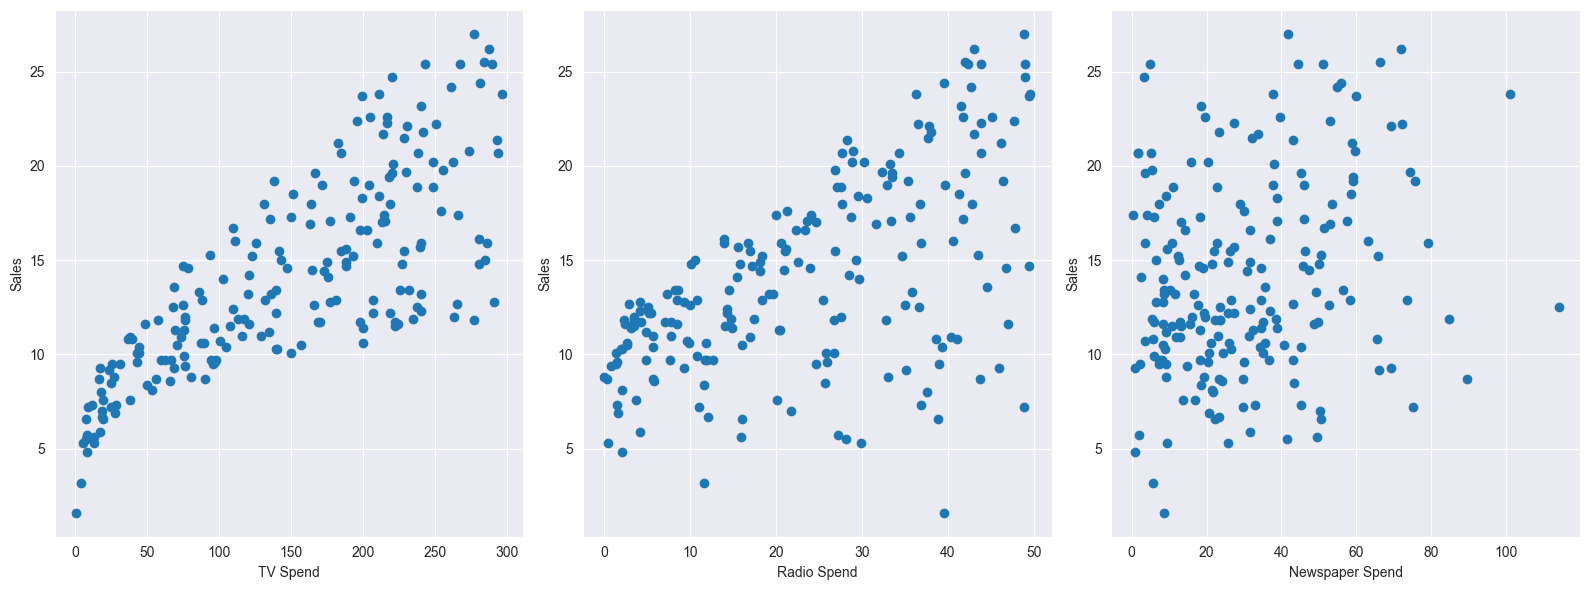

In [21]:
fog, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper Spend')

plt.tight_layout()

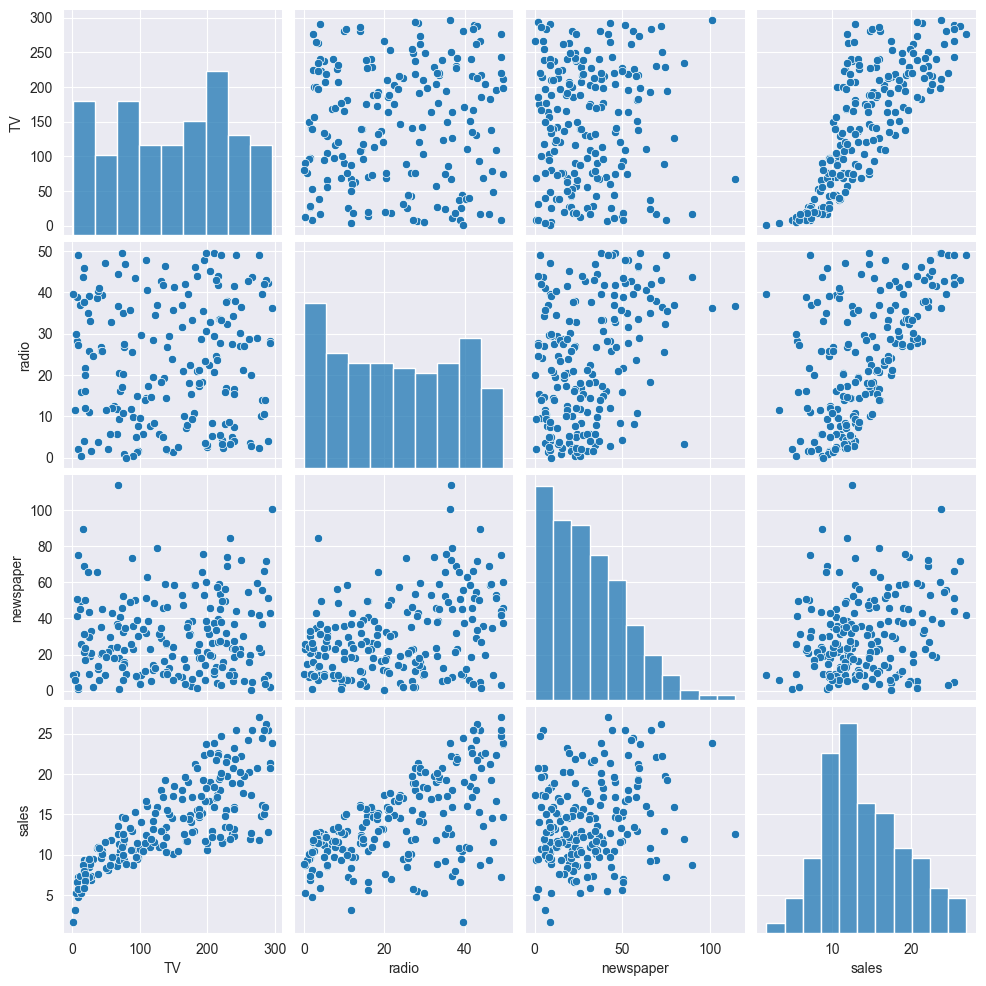

In [22]:
sns.pairplot(df)

In [23]:
X = df.drop('sales', axis=1)

In [24]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [25]:
y = df['sales']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
model.predict(X_test)

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

# 89. Linear Regression - Scikit-Learn Performance Evaluation - Regression

In [30]:
test_predictions = model.predict(X_test)

In [31]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

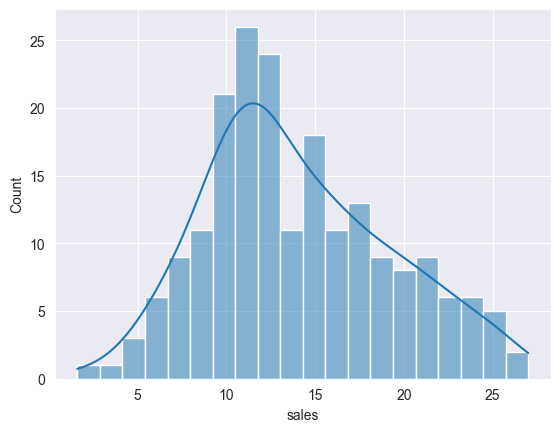

In [32]:
sns.histplot(data=df, x='sales', bins=20, kde=True)

In [33]:
mean_absolute_error(y_test, test_predictions)

1.5116692224549086

In [34]:
# RMSE - Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, test_predictions))

1.9485372043446387

# 90. Linear Regression - Residual Plots

In [35]:
test_residuals = y_test - test_predictions

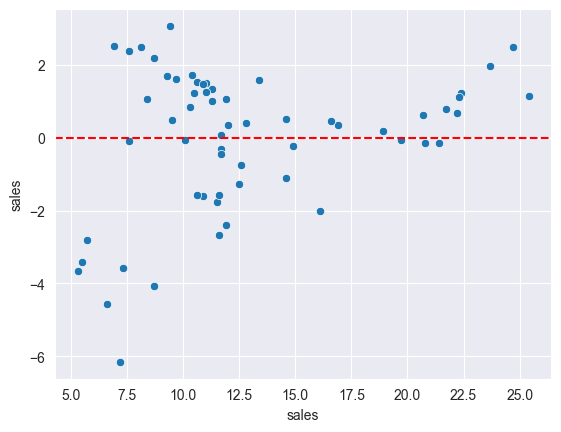

In [36]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

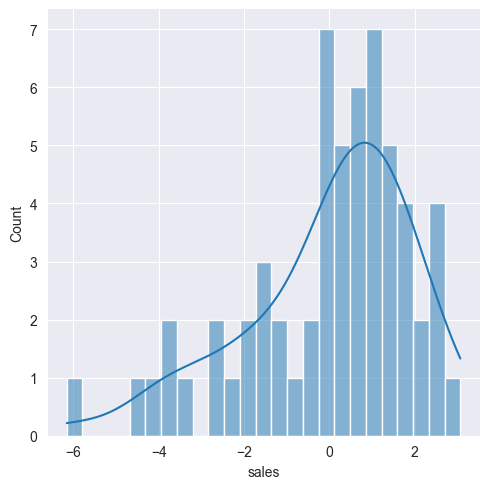

In [37]:
sns.displot(test_residuals, bins=25, kde=True)

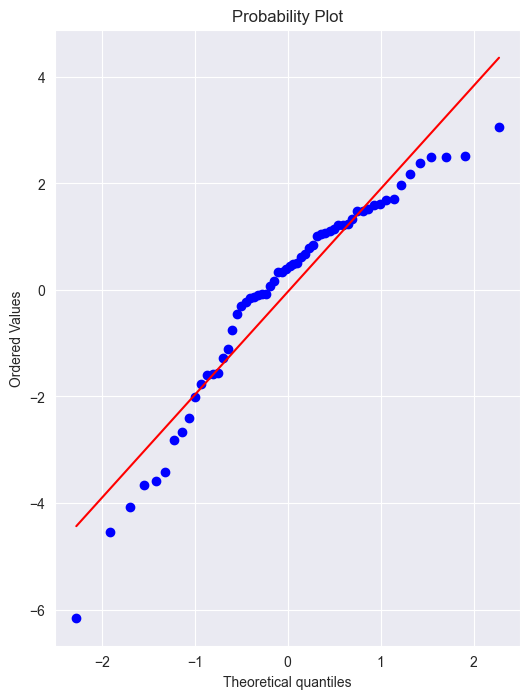

In [38]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

# 91. Linear Regression - Model Deployment and Coefficient Interpretation

In [39]:
final_model = LinearRegression() # create a new model

In [40]:
final_model.fit(X, y) # fit on the entire dataset

LinearRegression()

In [41]:
final_model.coef_ # coefficients

array([ 0.04576465,  0.18853002, -0.00103749])

In [42]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [43]:
y_hat = final_model.predict(X)

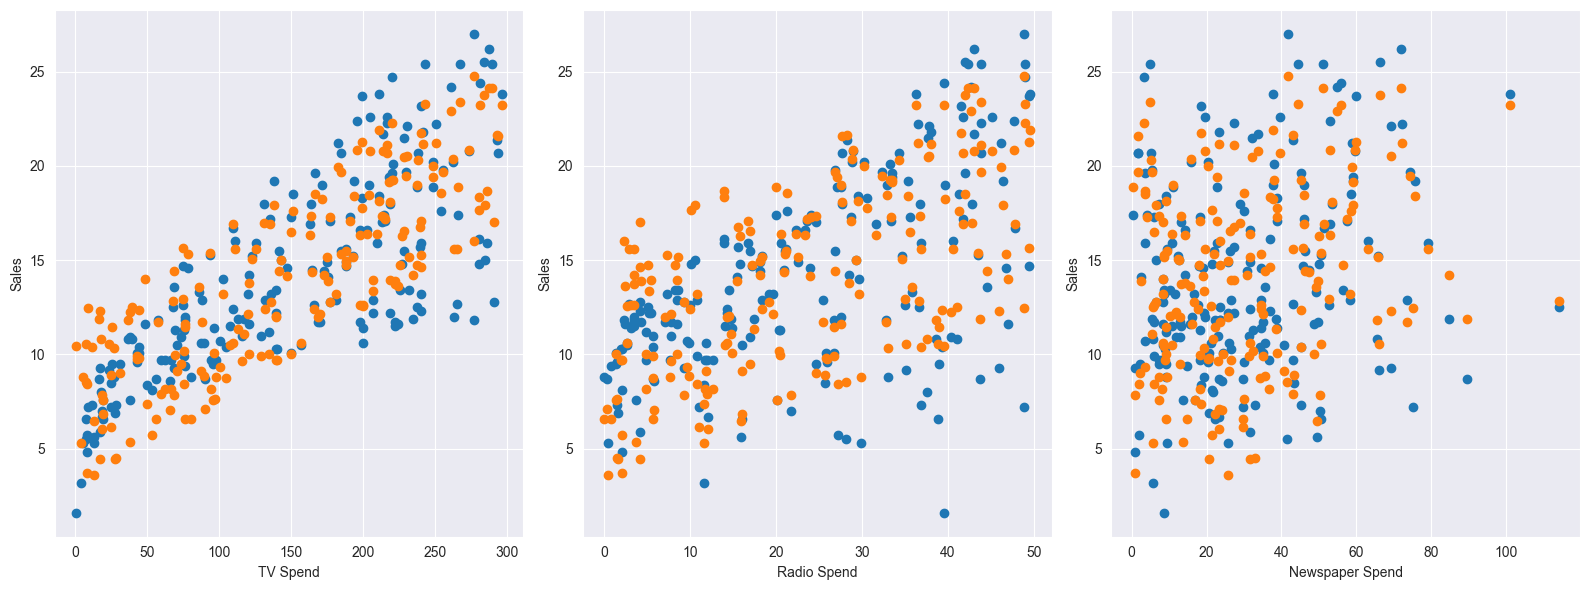

In [44]:
fog, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper Spend')

plt.tight_layout()

In [45]:
from joblib import dump, load

In [46]:
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

In [47]:
loaded_model = load('sales_model.joblib')

In [48]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [49]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales = 149*TV + 22*Radio + 12*Newspaper + 4.24302822
campaign = pd.DataFrame([[149, 22, 12]], columns=['TV', 'radio', 'newspaper'])
# Has to have columns in the same order as the model was trained

In [50]:
loaded_model.predict(campaign)

array([13.893032])

# 92. Polynomial Regression - Theory and Motivation

In [51]:
X = df.drop('sales', axis=1)

In [52]:
y = df['sales']

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [55]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [56]:
poly_features = polynomial_converter.transform(X)

In [57]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

# 94. Polynomial Regression - Training and Evaluation

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()

In [62]:
model.fit(X_train, y_train)

LinearRegression()

In [63]:
test_predictions = model.predict(X_test)

In [64]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
MAE = mean_absolute_error(y_test, test_predictions)

In [67]:
MSE = mean_squared_error(y_test, test_predictions)

In [68]:
RMSE = np.sqrt(MSE)

In [69]:
MAE

0.48967980448035886

In [70]:
RMSE

0.6646431757269

In [71]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [72]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [73]:
# 230.1 TV, 37.8 Radio, 69.2 Newspaper
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [74]:
# Sales = B3*X^3 + B2*X^2 + B1*X + B0
69.2**2

4788.64

# 95. Bias Variance Trade-Off

# 96. Polynomial Regression - Choosing Degree of Polynomial

In [75]:
# create the different order polynomial
# split poly feat train/test
# fit on train
# store/save the RMSE for BOTH train and test
# PLOT the results (error vs poly order)

In [76]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
  
  poly_converter = PolynomialFeatures(degree=d, include_bias=False)
  poly_features = poly_converter.fit_transform(X)
  
  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
  
  model = LinearRegression()
  model.fit(X_train, y_train)
  
  train_pred = model.predict(X_train)
  test_predict = model.predict(X_test)
  
  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
  
  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)

In [77]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020657,
 0.35170836883993556,
 0.2509342923789987,
 0.1943350322061968,
 5.421511117920049,
 0.1416555724002178,
 0.17231949398317276]

In [78]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269,
 0.5803286825219469,
 0.5077742640851456,
 2.575819388953378,
 4.326108924477438,
 1379.5706760334367,
 4506.560003895944,
 97547.23213898264]

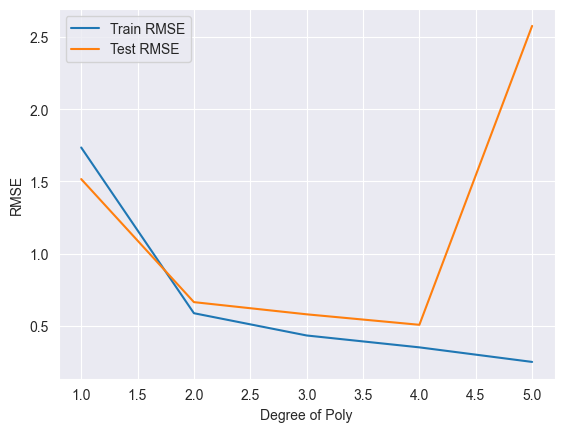

In [79]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1, 6), test_rmse_errors[:5], label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

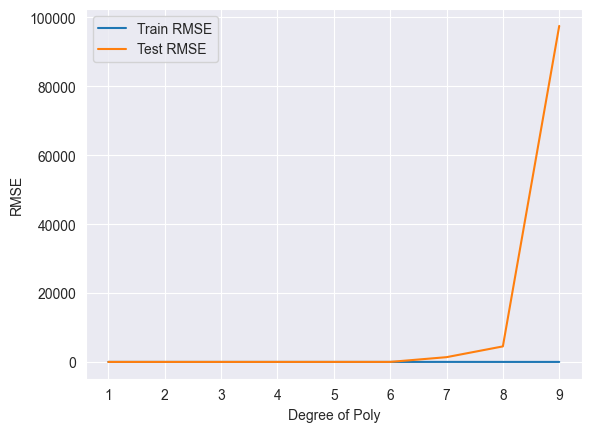

In [80]:
plt.plot(range(1, 10), train_rmse_errors, label='Train RMSE')
plt.plot(range(1, 10), test_rmse_errors, label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

# 97. Polynomial Regression - Model Deployment

In [81]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [82]:
final_model = LinearRegression()

In [83]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [84]:
from joblib import dump, load

In [85]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [86]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [87]:
loaded_converter = load('final_converter.joblib')

In [88]:
loaded_model = load('final_poly_model.joblib')

In [89]:
campaign = [[149, 22, 12]]

In [90]:
transformed_data = loaded_converter.fit_transform(campaign)

In [91]:
loaded_model.predict(transformed_data)

array([14.64501014])

# 101. Regularization Data Setup

In [92]:
data_dir = Path('data')
file_name = 'Advertising.csv'

file_path = data_dir / file_name

df = pd.read_csv(file_path)

In [93]:
X = df.drop('sales', axis=1)

In [94]:
y = df['sales']

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [97]:
poly_features = polynomial_converter.fit_transform(X)

In [98]:
poly_features.shape

(200, 19)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [101]:
X_train.shape

(140, 19)

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
# avoid data leakage
scaler.fit(X_train)

StandardScaler()

In [105]:
X_train = scaler.transform(X_train)

In [106]:
X_test = scaler.transform(X_test)

In [107]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [108]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

# 102. L2 Regularization - Ridge Regression Theory

# 103. L2 Regularization - Ridge Regression - Python Implementation

In [109]:
from sklearn.linear_model import Ridge

In [110]:
ridge_model = Ridge(alpha=10)

In [111]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [112]:
test_predictions = ridge_model.predict(X_test)

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [114]:
MAE = mean_absolute_error(y_test, test_predictions)

In [115]:
MAE

0.5774404204714166

In [116]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [117]:
RMSE

0.8946386461319648

In [118]:
from sklearn.linear_model import RidgeCV

In [119]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [120]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [121]:
ridge_cv_model.alpha_

0.1

In [122]:
test_predictions = ridge_cv_model.predict(X_test)

In [123]:
MAE = mean_absolute_error(y_test, test_predictions)

In [124]:
MAE

0.42737748843375084

In [125]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [126]:
RMSE

0.6180719926926787

In [127]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

# 104. L1 Regularization - Lasso Regression - Background and Implementation

In [128]:
from sklearn.linear_model import LassoCV

In [129]:
# lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000) # 
lasso_cv_model = LassoCV(eps=0.01, n_alphas=100, cv=5)

In [130]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.01)

In [131]:
lasso_cv_model

LassoCV(cv=5, eps=0.01)

In [132]:
lasso_cv_model.alpha_

0.049430709092258315

In [133]:
test_predictions = lasso_cv_model.predict(X_test)

In [134]:
MAE = mean_absolute_error(y_test, test_predictions)

In [135]:
MAE

0.5159788188265405

In [136]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [137]:
RMSE

0.7615440303260838

In [138]:
lasso_cv_model.coef_

array([ 2.35600233,  0.21183181,  0.        , -0.        ,  3.78675114,
       -0.        ,  0.        ,  0.0624318 ,  0.        , -1.01152151,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

# 105. L1 and L2 Regularization - Elastic Net

In [139]:
from sklearn.linear_model import ElasticNetCV

In [142]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)

In [143]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [144]:
elastic_model.l1_ratio_

1.0

In [145]:
elastic_model.alpha_

0.004943070909225831

In [146]:
lasso_cv_model.alpha_

0.049430709092258315

In [147]:
test_predictions = elastic_model.predict(X_test)

In [148]:
MAE = mean_absolute_error(y_test, test_predictions)

In [149]:
MAE

0.4335034618590074

In [150]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [151]:
RMSE

0.6063140748984036

# 106. Linear Regression Project - Data Overview